In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['date','avgtemp', 'mintemp', 'pp', 'snow', 'wind-dir', 'wind-speed', 'wind-gut', 'air-pressure', 'sunshine', 'dummy']
        
daily_weather_df = pd.read_csv('KCQT0.csv',sep=',',names=col_names,header=None)

#Delete irrelevant cols
del daily_weather_df['dummy']
del daily_weather_df['air-pressure']
del daily_weather_df['wind-speed']
del daily_weather_df['snow']
del daily_weather_df['wind-dir']
del daily_weather_df['date']
del daily_weather_df['mintemp']


In [3]:
daily_weather_df.head()

,avgtemp,pp,wind-gut,sunshine
0,10.4,13.9,2.0,1018.9
1,12.0,15.6,8.1,1021.0
2,11.4,18.9,1.3,1026.5
3,12.6,20.0,3.0,1024.9
4,13.3,21.7,1.9,1018.0


In [4]:
#get temperatures of the last 365 days
daily_temp = daily_weather_df['avgtemp'].to_numpy()[-365:]
print(f"the first 10 entries in daily_temp are {daily_temp[:10]}")

mean_temp = np.nanmean(daily_temp)  #find the meand ignore the NaN values
variance = np.nanvar(daily_temp)
print(f"Mean tempreature is {mean_temp} celsius")
print(f"Variance is {variance}")

the first 10 entries in daily_temp are [13.7 13.8 16.3 20.3 18.5 17.2 21.5 22.6 17.8 15.6]
Mean tempreature is 17.9586301369863 celsius
Variance is 14.816672096078067


In [5]:
print(daily_weather_df.isnull().sum())

avgtemp       9
pp            9
wind-gut    208
sunshine    224
dtype: int64


In [6]:
daily_weather_df.shape

(2758, 4)

In [7]:
weather_features = daily_weather_df.drop(['pp'], axis=1)

weather_features.head()

,avgtemp,wind-gut,sunshine
0,10.4,2.0,1018.9
1,12.0,8.1,1021.0
2,11.4,1.3,1026.5
3,12.6,3.0,1024.9
4,13.3,1.9,1018.0


In [8]:
precipitation_labels = daily_weather_df['pp']
precipitation_labels.head()

0    13.9
1    15.6
2    18.9
3    20.0
4    21.7
Name: pp, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather_features,precipitation_labels,test_size=0.3,random_state=10,shuffle=True)
#shuffle xao tron du lieu

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Test data: {X_test.shape},{y_test.shape}")


Training data: (1930, 3), (1930,)
Test data: (828, 3),(828,)


In [11]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

[Text(167.4, 195.696, 'X[0] <= 18.45\nsquared_error = 23.397\nsamples = 1694\nvalue = 22.947'),
 Text(83.7, 152.208, 'X[0] <= 14.95\nsquared_error = 9.747\nsamples = 985\nvalue = 19.83'),
 Text(41.85, 108.72, 'X[0] <= 12.25\nsquared_error = 5.787\nsamples = 479\nvalue = 17.677'),
 Text(20.925, 65.232, 'X[2] <= 1020.2\nsquared_error = 4.357\nsamples = 127\nvalue = 15.425'),
 Text(10.4625, 21.744, 'squared_error = 3.271\nsamples = 85\nvalue = 14.621'),
 Text(31.387500000000003, 21.744, 'squared_error = 2.598\nsamples = 42\nvalue = 17.052'),
 Text(62.775000000000006, 65.232, 'X[2] <= 1015.15\nsquared_error = 3.814\nsamples = 352\nvalue = 18.489'),
 Text(52.3125, 21.744, 'squared_error = 2.416\nsamples = 78\nvalue = 17.117'),
 Text(73.2375, 21.744, 'squared_error = 3.524\nsamples = 274\nvalue = 18.88'),
 Text(125.55000000000001, 108.72, 'X[0] <= 16.15\nsquared_error = 4.947\nsamples = 506\nvalue = 21.869'),
 Text(104.625, 65.232, 'X[2] <= 1016.95\nsquared_error = 3.941\nsamples = 188\nvalu

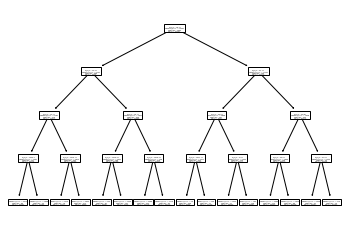

In [18]:
from sklearn import tree
tree.plot_tree(tree_reg)

In [1]:
#visual
from sklearn.tree import export_graphviz
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(
    tree_reg,
    out_file=None,
    feature_names=weather_features.columns,
    rounded=True,
    filled=True
)

prettier_graph = graphviz.Source(dot_data)
prettier_graph

NameError: name 'tree_reg' is not defined